In [1]:
import numpy as np 
import matplotlib.pyplot as plt

x =  0.480581
y = 0.26251
vx = 0.0124944
vy = .214933
k = 1

O = 2

In [2]:
t_max = 8
N = 1000

t = np.linspace(0,t_max,N)

h = t[1] - t[0]

X = np.zeros(N)
Y = np.zeros(N)

Vx = np.zeros(N)
Vy = np.zeros(N)

X[0] = x
Y[0] = y
Vx[0] = vx
Vy[0] = vy

In [3]:
def J2(x,y,vx,vy):

    return ((x*vy) - (y*vx))**2 

def A(x,y,vx,vy):
    
    return vx

def B(x,y,vx,vy):
    
    return vy


def C(x,y,vx,vy):
    
    value1 = (x*(O + k*(vx**2 - 2*O*x**2 - 2*k*vx**2*x**2 + k*O*x**4 + k**2*vx**2*x**4 - O*y**2 - 5*k*vx**2*y**2 + k*O*x**2*y**2 + 
    6*k**2*vx**2*x**2*y**2 - k**3*vx**2*x**4*y**2 + 8*k**2*vx**2*y**4 - 4*k**3*vx**2*x**2*y**4 - 4*k**3*vx**2*y**6 - 
    vy**2*(-1 + k*x**2)*(-1 + k*x**2 + 2*k*y**2)**2 + 2*k*vx*vy*x*y*(-1 + k*x**2 + 2*k*y**2)**2)))/((-1 + k*x**2 + 2*k*y**2)**2*(-1 + k*(x**2 + y**2)))


    return value1


def D(x,y,vx,vy):
    
    value2 = (-((-1 + k*x**2)**2*(4*O + k*(vx**2 - O*x**2 - k*vx**2*x**2 + vy**2*(-1 + k*x**2)**2))*y) + 2*k**2*vx*vy*x*(-1 + k*x**2)**3*y**2 - 
    k*(-1 + k*x**2)*(8*O + k*(7*vx**2 + 6*vy**2 + x**2*(-3*O + k*vx**2*(-8 + k*x**2) + 6*k*vy**2*(-2 + k*x**2))))*y**3 + 
    12*k**3*vx*vy*x*(-1 + k*x**2)**2*y**4 - 2*k**2*(2*O + 
    k*(9*vx**2 + 6*vy**2 + x**2*(-O + 3*k*vx**2*(-4 + k*x**2) + 6*k*vy**2*(-2 + k*x**2))))*y**5 + 
    24*k**4*vx*vy*x*(-1 + k*x**2)*y**6 - 4*k**4*(2*vy**2*(-1 + k*x**2) + vx**2*(-5 + 3*k*x**2))*y**7 + 16*k**5*vx*vy*x*y**8 - 
    8*k**5*vx**2*y**9)/((-1 + k*x**2)**4 + 7*k*(-1 + k*x**2)**3*y**2 + 18*k**2*(-1 + k*x**2)**2*y**4 + 20*k**3*(-1 + k*x**2)*y**6 + 8*k**4*y**8)

    
    return value2

In [4]:
for i in range(1,N,1):
    
    k0 = h*A(x,y,vx,vy)
    l0 = h*B(x,y,vx,vy)
    m0 = h*C(x,y,vx,vy)
    n0 = h*D(x,y,vx,vy)
    
    k1 = h*A(x+0.5*k0,y+0.5*l0,vx+0.5*m0,vy+0.5*n0)
    l1 = h*B(x+0.5*k0,y+0.5*l0,vx+0.5*m0,vy+0.5*n0)
    m1 = h*C(x+0.5*k0,y+0.5*l0,vx+0.5*m0,vy+0.5*n0)
    n1 = h*D(x+0.5*k0,y+0.5*l0,vx+0.5*m0,vy+0.5*n0)
    
    k2 = h*A(x+0.5*k1,y+0.5*l1,vx+0.5*m1,vy+0.5*n1)
    l2 = h*B(x+0.5*k1,y+0.5*l1,vx+0.5*m1,vy+0.5*n1)
    m2 = h*C(x+0.5*k1,y+0.5*l1,vx+0.5*m1,vy+0.5*n1)
    n2 = h*D(x+0.5*k1,y+0.5*l1,vx+0.5*m1,vy+0.5*n1)
    
    k3 = h*A(x+k2,y+l2,vx+m2,vy+n2)
    l3 = h*B(x+k2,y+l2,vx+m2,vy+n2)
    m3 = h*C(x+k2,y+l2,vx+m2,vy+n2)
    n3 = h*D(x+k2,y+l2,vx+m2,vy+n2)
    
    
    tempx  = (1/6)*(k0+2*k1+2*k2+k3) 
    tempy  = (1/6)*(l0+2*l1+2*l2+l3)
    tempvx = (1/6)*(m0+2*m1+2*m2+m3)
    tempvy = (1/6)*(n0+2*n1+2*n2+n3)
    
    x = x  +  tempx
    y = y  +  tempy
    vx= vx +  tempvx
    vy= vy +  tempvy
    
    
    X[i] = x
    Y[i] = y
    Vx[i] = vx
    Vy[i] = vy
    

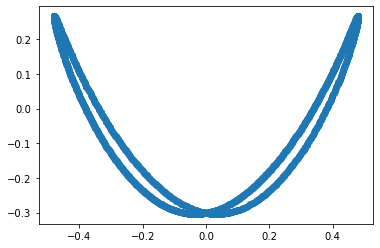

In [5]:
plt.scatter(X,Y)

In [6]:
h

0.008008008008008008

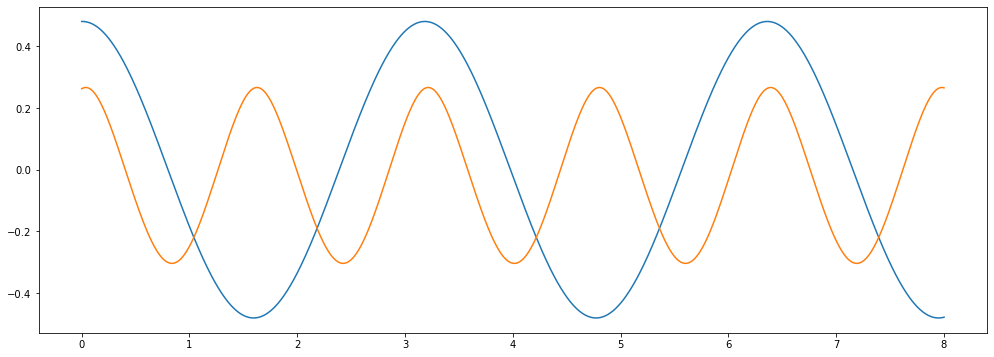

In [7]:
plt.figure(figsize=(17,6))
plt.plot(t,X)
plt.plot(t,Y)

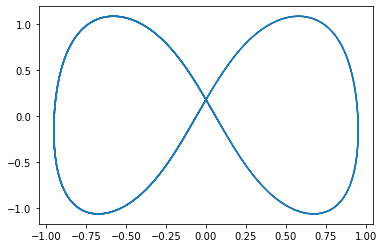

In [8]:
plt.plot(Vx,Vy)

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [10]:
# Time Array

# Position Arrays
x = X
y = Y
Z2 = 1-(X**2 + Y**2)
z = np.sqrt(Z2)
# Setting up Data Set for Animation
dataSet = np.array([x, y, z])  # Combining our position coordinates
numDataPoints = len(t)

In [11]:
dataSet.shape

(3, 1000)

In [12]:
def animate_func(num):
    ax.clear()  # Clears the figure to update the line, point,   
                # title, and axes
    ax.set_aspect('auto')

    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)

    x = 1 * np.outer(np.cos(u), np.sin(v))
    y = 1 * np.outer(np.sin(u), np.sin(v))
    z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

    ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='k', linewidth=0, alpha=0.1)
        
    # Updating Trajectory Line (num+1 due to Python indexing)
    ax.plot3D(dataSet[0, :num+1], dataSet[1, :num+1], 
              dataSet[2, :num+1], c='blue')
    # Updating Point Location 
    ax.scatter(dataSet[0, num], dataSet[1, num], dataSet[2, num], 
               c='blue', marker='o')
    # Adding Constant Origin
    ax.plot3D(dataSet[0, 0], dataSet[1, 0], dataSet[2, 0],     
               c='black', marker='o')
    # Setting Axes Limits
    ax.set_xlim3d([-1,1 ])
    ax.set_ylim3d([-1, 1])
    ax.set_zlim3d([-1, 1])

    # Adding Figure Labels
    ax.set_title('Trajectory \nTime = ' + str(np.round(t[num],    
                 decimals=2)) + ' sec')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

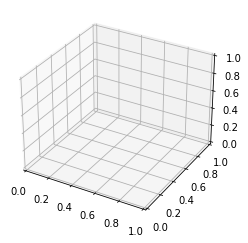

In [13]:
# Plotting the Animation
fig = plt.figure()
ax = plt.axes(projection='3d')
line_ani = animation.FuncAnimation(fig, animate_func, interval=2,   
                                   frames=5000)

plt.show()

In [14]:
I2 = (Vy - k*X*(Vy*X - Vx*Y))**2/(1 - k*(X**2 + Y**2)) + (4*O*Y**2*(1 - k*(X**2 + Y**2)))/(1 - k*Y**2 - k*(X**2 + Y**2))**2

In [15]:
I1 = k*(Vy*X - Vx*Y)**2 + (Vx + k*Y*(Vy*X - Vx*Y))**2/(1 - k*(X**2 + Y**2)) + (O*X**2*(1 - k*X**2))/(1 - k*Y**2 - k*(X**2 + Y**2))**2

In [16]:
I3 = ((Vy*X - Vx*Y)*(Vx + k*Y*(Vy*X - Vx*Y)))/np.sqrt(1 - k*(X**2 + Y**2)) + (O*X**2*Y*np.sqrt(1 - k*(X**2 + Y**2)))/(1 - k*Y**2 - k*(X**2 + Y**2))**2

In [17]:
I1[0]

0.9037125063047068

In [18]:
I2[0]

1.008496703137288

In [19]:
I3[0]

0.25927849813128395

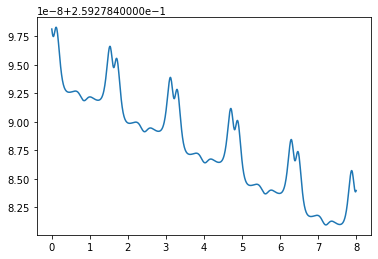

In [21]:
plt.plot(t,I3)